In [123]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 999
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_recall_fscore_support

<b>The goal of my study is to find out answers to the following questions:</b><br/>
1. Finding the optimal days to publish a certain type of article for it to become popular<br/>
2. Predict the popularity of a give article using classification methods.

In [2]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\Supervised Learning Capstone\OnlineNewsPopularity\OnlineNewsPopularity.csv")
df.columns = df.columns.str.replace(' ', '')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
print('Number of rows: {} \nNumber of colmuns: {}\n'.format(df.shape[0],df.shape[1]))
for i in df.columns:
  print('{} is unique: {}'.format(i, df[i].is_unique))

Number of rows: 39644 
Number of colmuns: 61

url is unique: True
timedelta is unique: False
n_tokens_title is unique: False
n_tokens_content is unique: False
n_unique_tokens is unique: False
n_non_stop_words is unique: False
n_non_stop_unique_tokens is unique: False
num_hrefs is unique: False
num_self_hrefs is unique: False
num_imgs is unique: False
num_videos is unique: False
average_token_length is unique: False
num_keywords is unique: False
data_channel_is_lifestyle is unique: False
data_channel_is_entertainment is unique: False
data_channel_is_bus is unique: False
data_channel_is_socmed is unique: False
data_channel_is_tech is unique: False
data_channel_is_world is unique: False
kw_min_min is unique: False
kw_max_min is unique: False
kw_avg_min is unique: False
kw_min_max is unique: False
kw_max_max is unique: False
kw_avg_max is unique: False
kw_min_avg is unique: False
kw_max_avg is unique: False
kw_avg_avg is unique: False
self_reference_min_shares is unique: False
self_referen

In [4]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [5]:
print(df.query('n_tokens_content<=0 | n_non_stop_words<=0').n_tokens_content.count())
df = df[(df.n_tokens_content > 0) & (df.n_non_stop_words > 0)]
df.n_tokens_content.count()

1181


38463

In [6]:
#remove rows that do not belong to any news type
df.query('data_channel_is_lifestyle == 0 & data_channel_is_entertainment == 0 & data_channel_is_bus == 0 & data_channel_is_socmed == 0 & data_channel_is_tech == 0 & data_channel_is_world == 0').count()

df.drop(df.query('data_channel_is_lifestyle == 0 & data_channel_is_entertainment == 0 & data_channel_is_bus == 0 & data_channel_is_socmed == 0 & data_channel_is_tech == 0 & data_channel_is_world == 0').index, inplace = True) 
df.shape

(32972, 61)

In [7]:
print(df.isnull().values.sum())

0


In [8]:
def update_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    df_updatedOutliers = df
    for name in list(df.columns):
        df_updatedOutliers[name] = np.where((df[name] < quant_df.loc[low, name]), quant_df.loc[low, name],np.where((df[name] > quant_df.loc[high, name]), quant_df.loc[high, name], df[name]))
    return df_updatedOutliers
df_updatedOutliers = update_outlier(df.drop(['url'],1))
print(df_updatedOutliers.shape)

#Remove outliers
#from scipy import stats
#df_removedOutliers = df.drop(['url'],1)
#df_removedOutliers = df_removedOutliers[(np.abs(stats.zscore(df_removedOutliers)) < 3).all(axis=1)]
#df_removedOutliers.shape

(32972, 60)


In [9]:
df_updatedOutliers.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,32972.000000,32972.000000,32972.000000,32972.000000,3.297200e+04,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000
mean,355.567603,10.397276,567.445015,0.537245,1.000000e+00,0.692063,9.830462,3.103330,3.297222,0.506126,4.680737,7.191587,0.062993,0.207934,0.189100,0.070090,0.222158,0.247725,25.763891,843.974251,269.732477,6641.284696,753532.706539,237403.510379,1017.749445,4686.569328,2827.915150,2216.520233,6202.371897,3879.941123,0.172207,0.187371,0.189646,0.184065,0.141453,0.060445,0.064813,0.125258,0.207246,0.136359,0.242032,0.132603,0.266817,0.446524,0.121413,0.040302,0.016261,0.708779,0.291163,0.356977,0.088169,0.781713,-0.258512,-0.537361,-0.099656,0.265132,0.068515,0.343994,0.132908,2237.761161
std,210.583860,1.966810,370.049864,0.088316,2.840478e-09,0.085170,7.278129,2.441807,4.912307,0.851537,0.241411,1.901703,0.242954,0.405835,0.391594,0.255302,0.415703,0.431698,69.190838,641.736837,170.846562,11857.855014,210333.652431,110727.079434,1041.700463,1640.742422,697.785637,2902.463880,8474.164315,4724.170477,0.377566,0.390215,0.392027,0.387543,0.348494,0.238313,0.246199,0.331016,0.274208,0.208728,0.291657,0.205234,0.300540,0.071896,0.077746,0.014200,0.008250,0.130626,0.130617,0.068724,0.045463,0.198901,0.093694,0.269517,0.055942,0.314101,0.194570,0.188364,0.182235,2123.245315
min,44.000000,7.000000,148.000000,0.383644,1.000000e+00,0.530322,2.000000,0.000000,0.000000,0.000000,4.256344,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,86.000000,33.000000,0.000000,69100.000000,27630.873016,0.000000,3248.573427,1740.095940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020041,0.020009,0.020023,0.020015,0.020577,0.310096,-0.020282,0.016760,0.003378,0.451613,0.071429,0.232722,0.033333,0.500000,-0.448415,-1.000000,-0.250000,0.000000,-0.300000,0.000000,0.000000,576.000000
25%,168.000000,9.000000,279.000000,0.470779,1.000000e+00,0.631970,5.000000,1.000000,1.000000,0.000000,4.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,141.567460,0.000000,843300.000000,165308.333333,0.000000,3498.957378,2311.074246,654.000000,1100.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025234,0.025

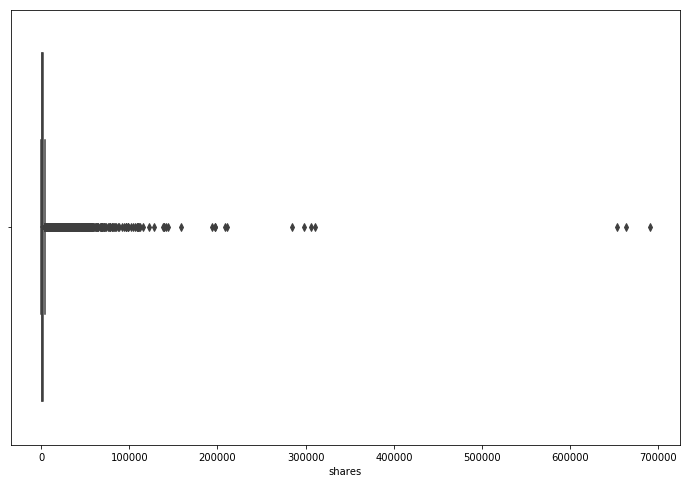

In [10]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(df['shares'])

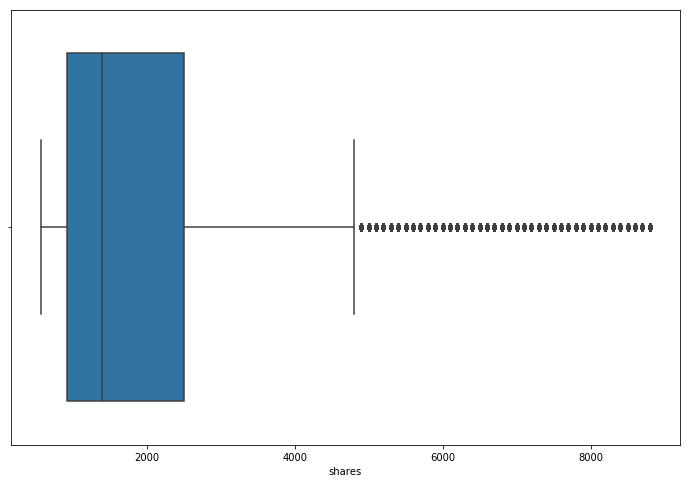

In [11]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(df_updatedOutliers['shares'])

In [12]:
#Add a new column to biinarize the shares. The article is popular if the number of shares is greater than 1400
df_updatedOutliers['isPopular'] = np.where(df_updatedOutliers['shares']>=1400, 1, 0)

In [13]:
df_updatedOutliers.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,isPopular
count,32972.000000,32972.000000,32972.000000,32972.000000,3.297200e+04,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000
mean,355.567603,10.397276,567.445015,0.537245,1.000000e+00,0.692063,9.830462,3.103330,3.297222,0.506126,4.680737,7.191587,0.062993,0.207934,0.189100,0.070090,0.222158,0.247725,25.763891,843.974251,269.732477,6641.284696,753532.706539,237403.510379,1017.749445,4686.569328,2827.915150,2216.520233,6202.371897,3879.941123,0.172207,0.187371,0.189646,0.184065,0.141453,0.060445,0.064813,0.125258,0.207246,0.136359,0.242032,0.132603,0.266817,0.446524,0.121413,0.040302,0.016261,0.708779,0.291163,0.356977,0.088169,0.781713,-0.258512,-0.537361,-0.099656,0.265132,0.068515,0.343994,0.132908,2237.761161,0.513254
std,210.583860,1.966810,370.049864,0.088316,2.840478e-09,0.085170,7.278129,2.441807,4.912307,0.851537,0.241411,1.901703,0.242954,0.405835,0.391594,0.255302,0.415703,0.431698,69.190838,641.736837,170.846562,11857.855014,210333.652431,110727.079434,1041.700463,1640.742422,697.785637,2902.463880,8474.164315,4724.170477,0.377566,0.390215,0.392027,0.387543,0.348494,0.238313,0.246199,0.331016,0.274208,0.208728,0.291657,0.205234,0.300540,0.071896,0.077746,0.014200,0.008250,0.130626,0.130617,0.068724,0.045463,0.198901,0.093694,0.269517,0.055942,0.314101,0.194570,0.188364,0.182235,2123.245315,0.499832
min,44.000000,7.000000,148.000000,0.383644,1.000000e+00,0.530322,2.000000,0.000000,0.000000,0.000000,4.256344,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,86.000000,33.000000,0.000000,69100.000000,27630.873016,0.000000,3248.573427,1740.095940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020041,0.020009,0.020023,0.020015,0.020577,0.310096,-0.020282,0.016760,0.003378,0.451613,0.071429,0.232722,0.033333,0.500000,-0.448415,-1.000000,-0.250000,0.000000,-0.300000,0.000000,0.000000,576.000000,0.000000
25%,168.000000,9.000000,279.000000,0.470779,1.000000e+00,0.631970,5.000000,1.000000,1.000000,0.000000,4.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,141.567460,0.000000,843300.000000,165308.333333,0.000000,3498.957378,2311.074246,654.000000,1100.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,

In [14]:
df_updatedOutliers.reset_index(inplace=True)
df_updatedOutliers.describe()

,index,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,isPopular
count,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,3.297200e+04,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000,32972.000000
mean,19758.088257,355.567603,10.397276,567.445015,0.537245,1.000000e+00,0.692063,9.830462,3.103330,3.297222,0.506126,4.680737,7.191587,0.062993,0.207934,0.189100,0.070090,0.222158,0.247725,25.763891,843.974251,269.732477,6641.284696,753532.706539,237403.510379,1017.749445,4686.569328,2827.915150,2216.520233,6202.371897,3879.941123,0.172207,0.187371,0.189646,0.184065,0.141453,0.060445,0.064813,0.125258,0.207246,0.136359,0.242032,0.132603,0.266817,0.446524,0.121413,0.040302,0.016261,0.708779,0.291163,0.356977,0.088169,0.781713,-0.258512,-0.537361,-0.099656,0.265132,0.068515,0.343994,0.132908,2237.761161,0.513254
std,11386.337101,210.583860,1.966810,370.049864,0.088316,2.840478e-09,0.085170,7.278129,2.441807,4.912307,0.851537,0.241411,1.901703,0.242954,0.405835,0.391594,0.255302,0.415703,0.431698,69.190838,641.736837,170.846562,11857.855014,210333.652431,110727.079434,1041.700463,1640.742422,697.785637,2902.463880,8474.164315,4724.170477,0.377566,0.390215,0.392027,0.387543,0.348494,0.238313,0.246199,0.331016,0.274208,0.208728,0.291657,0.205234,0.300540,0.071896,0.077746,0.014200,0.008250,0.130626,0.130617,0.068724,0.045463,0.198901,0.093694,0.269517,0.055942,0.314101,0.194570,0.188364,0.182235,2123.245315,0.499832
min,0.000000,44.000000,7.000000,148.000000,0.383644,1.000000e+00,0.530322,2.000000,0.000000,0.000000,0.000000,4.256344,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,86.000000,33.000000,0.000000,69100.000000,27630.873016,0.000000,3248.573427,1740.095940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020041,0.020009,0.020023,0.020015,0.020577,0.310096,-0.020282,0.016760,0.003378,0.451613,0.071429,0.232722,0.033333,0.500000,-0.448415,-1.000000,-0.250000,0.000000,-0.300000,0.000000,0.000000,576.000000,0.000000
25%,9856.750000,168.000000,9.000000,279.000000,0.470779,1.000000e+00,0.631970,5.000000,1.000000,1.000000,0.000000,4.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,442.000000,141.567460,0.000000,843300.000000,165308.333333,0.000000,3498.957378,2311.074246,654.0

<b>Looking at the columns in the dataset we can identify 5 different article topics:</b> <br/>
Lifestyle        
Entertainment    
Business             
Social media       
Technology           
World <br/>
The data also specifies the day of the week when the article was released.

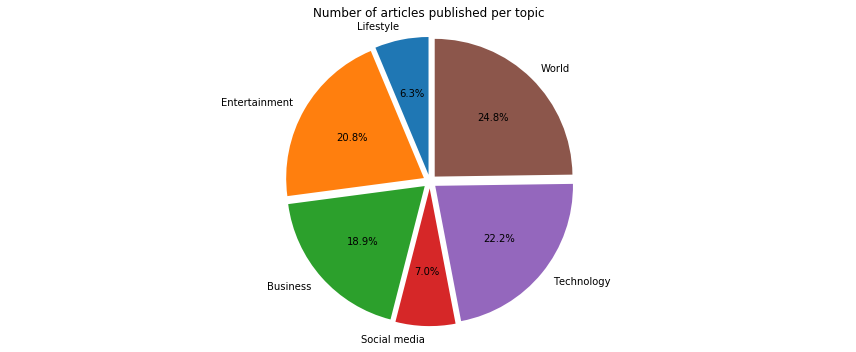

In [15]:
#Pie chart for different topics
labels = ['Lifestyle', 'Entertainment', 'Business', 'Social media', 'Technology', 'World']
topic_sizes = [df_updatedOutliers['data_channel_is_lifestyle'].sum(), df_updatedOutliers['data_channel_is_entertainment'].sum(),df_updatedOutliers['data_channel_is_bus'].sum(),df_updatedOutliers['data_channel_is_socmed'].sum(),df_updatedOutliers['data_channel_is_tech'].sum(),df_updatedOutliers['data_channel_is_world'].sum()]
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig, ax = plt.subplots(figsize=(12, 5))
ax.pie(topic_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title("Number of articles published per topic")
plt.tight_layout()
plt.show()

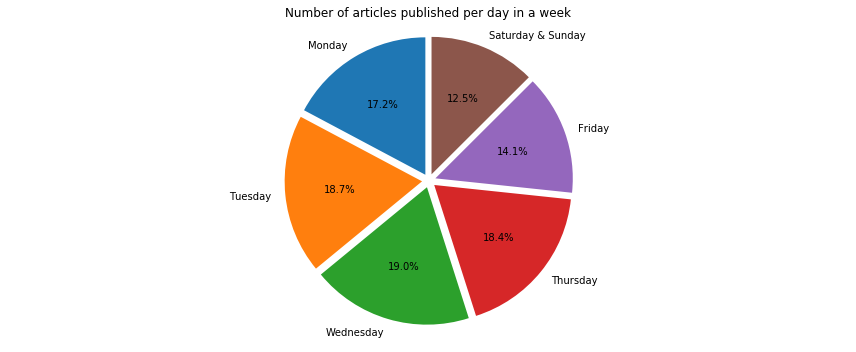

In [16]:
#Pie chart for different days of the week
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday & Sunday']
day_sizes = [df_updatedOutliers['weekday_is_monday'].sum(), df_updatedOutliers['weekday_is_tuesday'].sum(),df_updatedOutliers['weekday_is_wednesday'].sum(),df_updatedOutliers['weekday_is_thursday'].sum(),df_updatedOutliers['weekday_is_friday'].sum(),df_updatedOutliers['is_weekend'].sum()]
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
fig, ax = plt.subplots(figsize=(12, 5))
ax.pie(day_sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.title("Number of articles published per day in a week")
plt.tight_layout()
plt.show()

In [17]:
#Count of articles published per topic per week day
df_WeekDayDummies = df_updatedOutliers[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','is_weekend']]
df_WeekDayDummies.rename(columns={'weekday_is_monday':'Monday',
                          'weekday_is_tuesday':'Tuesday',
                          'weekday_is_wednesday':'Wednesday',
                          'weekday_is_thursday':'Thursday',
                          'weekday_is_friday':'Friday',
                          'is_weekend':'Saturday_and_Sunday'}, 
                 inplace=True)
print(df_WeekDayDummies.head())

df_TopicDummies = df_updatedOutliers[['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']]
df_TopicDummies.rename(columns={'data_channel_is_lifestyle':'Lifestyle',
                          'data_channel_is_entertainment':'Entertainment',
                          'data_channel_is_bus':'Business',
                          'data_channel_is_socmed':'Social_Media',
                          'data_channel_is_tech':'Technology',
                          'data_channel_is_world':'World'}, 
                 inplace=True)

df_TopicAndDay = pd.DataFrame(columns=['Topic', 'WeekDay', 'isPopular'])
df_TopicAndDay['Topic'] = pd.Series(df_TopicDummies.columns[np.where(df_TopicDummies!=0)[1]])
df_TopicAndDay['WeekDay'] = pd.Series(df_WeekDayDummies.columns[np.where(df_WeekDayDummies!=0)[1]]) 
df_TopicAndDay['isPopular'] = pd.Series(df_updatedOutliers['isPopular'])

   Monday  Tuesday  Wednesday  Thursday  Friday  Saturday_and_Sunday
0     1.0      0.0        0.0       0.0     0.0                  0.0
1     1.0      0.0        0.0       0.0     0.0                  0.0
2     1.0      0.0        0.0       0.0     0.0                  0.0
3     1.0      0.0        0.0       0.0     0.0                  0.0
4     1.0      0.0        0.0       0.0     0.0                  0.0


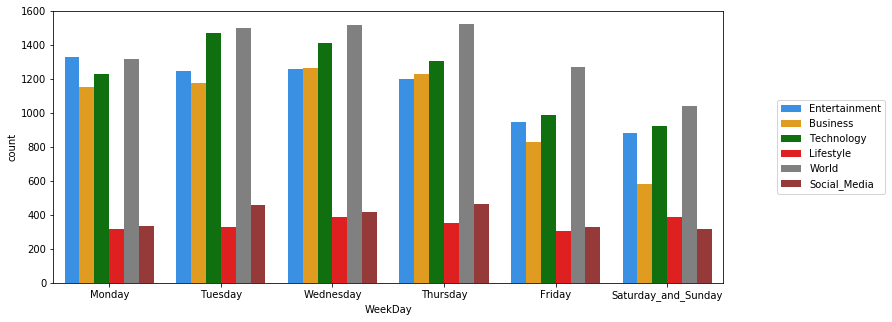

In [18]:
color_dict = dict({'Entertainment':'dodgerblue',
                  'Business':'orange',
                  'Technology': 'green',
                  'Lifestyle': 'red',
                   'World': 'grey',
                   'Social_Media': 'brown'})
plt.figure(figsize=(12,5))
g = sns.countplot(x="WeekDay", hue="Topic", data=df_TopicAndDay, palette=color_dict)
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))

In [19]:
df_TopicAndDay.count()

Topic        32972
WeekDay      32972
isPopular    32972
dtype: int64

In [20]:
df_agg = (df_TopicAndDay.groupby(['WeekDay','Topic']).agg({'isPopular':['count','sum']})).reset_index()
df_agg.columns = ["_".join(x) for x in df_agg.columns.ravel()]
df_agg.rename(columns={'WeekDay_':'WeekDay',
                       'Topic_':'Topic',
                        'isPopular_count':'no_of_articles',
                        'isPopular_sum':'no_of_popular_articles'}, 
                 inplace=True)
df_agg['pct_of_popular_articles'] = (100 * df_agg.no_of_popular_articles) / df_agg.no_of_articles
df_agg.head()

,WeekDay,Topic,no_of_articles,no_of_popular_articles,pct_of_popular_articles
0,Friday,Business,828,446,53.864734
1,Friday,Entertainment,946,387,40.909091
2,Friday,Lifestyle,304,171,56.250000
3,Friday,Social_Media,327,253,77.370031
4,Friday,Technology,987,672,68.085106


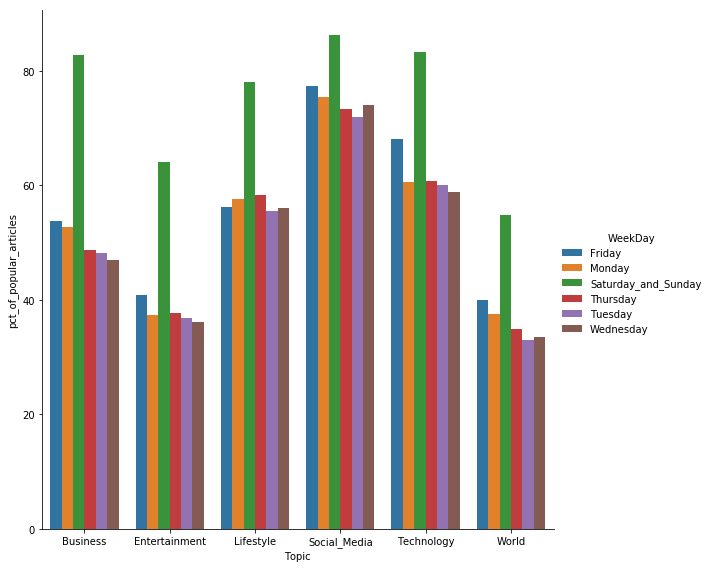

In [21]:
g = sns.catplot(x="Topic", y="pct_of_popular_articles", hue="WeekDay", data=df_agg, kind="bar", height=8)

The above graph indicates that articles of any topic will be more popular if they are published over the weekends. Also, topics related to social media and technology gain more attention than other topics.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

classifier = GradientBoostingClassifier()
clf = RandomForestClassifier(n_estimators=50, random_state=41, max_depth=3)

X = df_updatedOutliers.drop(['index','shares','isPopular'],1)
Y = df_updatedOutliers['isPopular']

print(cross_val_score(classifier, X, Y, cv=10))
print(cross_val_score(clf, X, Y, cv=10))

[0.51334142 0.27865373 0.35324439 0.43403094 0.50075827 0.34940855
 0.25841674 0.3117986  0.30118289 0.48665049]
[0.51637356 0.59733172 0.63250455 0.64270549 0.62936002 0.6581741
 0.65028814 0.66606005 0.67364271 0.55157767]


In [23]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

bnb = BernoulliNB()
neighbors = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(C=1e9)

print(cross_val_score(bnb, X, Y, cv=10))
print(cross_val_score(neighbors, X, Y, cv=10))
print(cross_val_score(lr, X, Y, cv=10))

[0.6055185  0.60915706 0.60733778 0.61116166 0.61085836 0.63754929
 0.64604186 0.63906582 0.62177737 0.61559466]
[0.48362644 0.32959369 0.46300788 0.55959964 0.55808311 0.55929633
 0.57203518 0.57173188 0.58234759 0.5621966 ]
[0.51637356 0.3835658  0.64038811 0.65392781 0.6081286  0.6281468
 0.62723688 0.61995754 0.65969063 0.62408981]


In [24]:
#from sklearn.svm import SVC
#svc = SVC(kernel = 'linear')
#YC = df_updatedOutliers['isPopular']
#svc.fit(X,YC)
#svc.score(X, YC)
#print(cross_val_score(svc, X, YC, cv=5))

<b>Applying various classification models to the cleaned dataset gave us the following average scores:</b><br/>
    Random Forest Classifier = 0.61<br/>
    Gradient Boosting Classifier = 0.39<br/>
    Bernoulli Naive Bayes =  0.61<br/>
    K Neighbors Classifier = 0.46<br/>
    Logistic Regression = 0.58<br/>
    
So far, Random forest, Naive Bayes and Logistic regression models have produced decent results compared to others.

In [25]:
#scores = cross_val_score(t, d_att,d_pass, cv=5)
#print ('Acuracy %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

In [26]:
from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components=20)
X_PCA = sklearn_pca.fit_transform(X)

In [27]:
print(cross_val_score(classifier, X_PCA, Y, cv=5))
print(cross_val_score(clf, X_PCA, Y, cv=5))
print(cross_val_score(bnb, X_PCA, Y, cv=5))
print(cross_val_score(neighbors, X_PCA, Y, cv=5))
print(cross_val_score(lr, X_PCA, Y, cv=5))

[0.5146323  0.56406368 0.61622441 0.62936002 0.55210071]
[0.52054587 0.61501137 0.61789234 0.62192903 0.62369179]
[0.51448067 0.59742229 0.59529947 0.60721868 0.62005157]
[0.49840788 0.513116   0.55633055 0.57158022 0.56620658]
[0.43821077 0.61849886 0.60955269 0.60388232 0.60230548]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# find best scored 5 features
select_feature = SelectKBest(f_classif, k=20).fit(x_train, y_train)
print('Scores:', select_feature.scores_)
selected_columns = x_train.columns[select_feature.get_support(indices=True)]
#print('Features:', selected_columns)
print('Features:', x_train.columns[select_feature.get_support(indices=True)])

Scores: [8.49631290e+01 5.37203081e+01 1.15581071e+02 1.21279010e+02
 1.39866667e+02 1.13856660e+02 2.36430551e+02 6.21172395e+01
 1.03643140e+02 9.83503205e+00 9.02670917e+01 1.52803525e+02
 5.28324408e+01 2.50643656e+02 8.64433124e+00 4.27209068e+02
 3.89740720e+02 5.34775879e+02 8.21630779e+01 1.74275410e+02
 2.35778944e+02 3.68852422e+01 4.87231655e+01 4.00016339e+00
 1.53673079e+02 5.20997282e+02 1.01462514e+03 4.48908522e+02
 3.88135789e+02 5.37204970e+02 7.19589810e+00 3.07781052e+01
 5.06904940e+01 2.48718895e+01 2.63871297e-01 3.06630392e+02
 2.05511372e+02 5.48021720e+02 2.14631315e+02 1.93720369e+02
 5.61613178e+02 2.69596967e-01 4.13040552e+02 2.25054743e+02
 2.58096365e+02 2.51530780e+02 2.98599370e+01 2.22385652e+02
 2.21622928e+02 2.75555768e+01 9.55241505e+01 1.03848276e+02
 2.02504334e+00 9.17240558e-01 7.31918690e+00 1.37548641e+01
 7.19963112e+01 7.19086647e-01 1.71122806e+01]
Features: Index(['num_hrefs', 'data_channel_is_entertainment', 'data_channel_is_socmed',
  

In [100]:
X_kbest = X[selected_columns]

print(cross_val_score(classifier, X_kbest, Y, cv=5))
print(cross_val_score(clf, X_kbest, Y, cv=5))
print(cross_val_score(bnb, X_kbest, Y, cv=5))
print(cross_val_score(neighbors, X_kbest, Y, cv=5))
print(cross_val_score(lr, X_kbest, Y, cv=5))

[0.60591357 0.64776346 0.66171342 0.66985138 0.66676778]
[0.59014405 0.62835481 0.64503412 0.65802244 0.67025633]
[0.59605762 0.60181956 0.62501895 0.64467698 0.62733202]
[0.54298711 0.56254738 0.56770281 0.5726418  0.58819961]
[0.60803639 0.61546626 0.65185747 0.67606915 0.66616108]


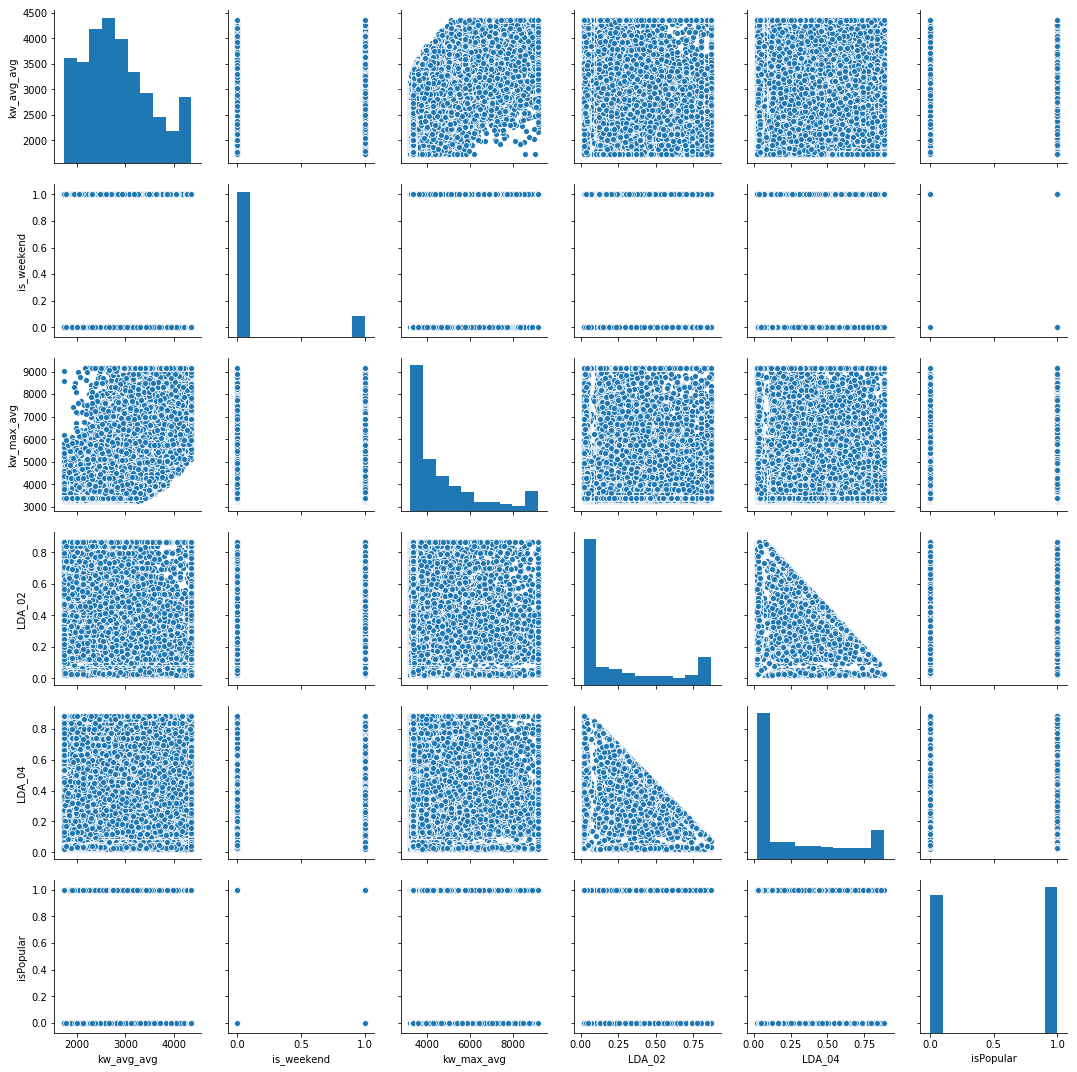

In [136]:
X_pairplot = X_kbest
X_pairplot['isPopular'] = df_updatedOutliers['isPopular']
g = sns.pairplot(X_pairplot, vars=["kw_avg_avg", "is_weekend","kw_max_avg", "LDA_02","LDA_04","isPopular"])

In [83]:
from sklearn.feature_selection import RFE
clf_rf = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf, n_features_to_select=20, step=1)
rfe = rfe.fit(x_train, y_train)
selected_columns_rfe = x_train.columns[rfe.get_support(indices=True)]
print('Chosen best 20 feature by rfe:',x_train.columns[rfe.get_support(indices=False)])

Chosen best 20 feature by rfe: Index(['timedelta', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_unique_tokens', 'average_token_length', 'kw_avg_min',
       'kw_avg_max', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity'],
      dtype='object')


In [84]:
X_RFE = X[selected_columns_rfe]

print(cross_val_score(classifier, X_RFE, Y, cv=5))
print(cross_val_score(clf, X_RFE, Y, cv=5))
print(cross_val_score(bnb, X_RFE, Y, cv=5))
print(cross_val_score(neighbors, X_RFE, Y, cv=5))
print(cross_val_score(lr, X_RFE, Y, cv=5))

[0.51432904 0.43411676 0.43639121 0.3770094  0.48688002]
[0.51554208 0.62092494 0.62911296 0.63315135 0.4870317 ]
[0.50583776 0.51796816 0.53601213 0.53806491 0.54133172]
[0.53510235 0.56285064 0.5601213  0.57719139 0.58395268]
[0.55663381 0.61561789 0.60621683 0.62314225 0.61823146]


In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
#max_depths = np.linspace(1, 32, 32, endpoint=True)
max_features = list(range(1,X_RFE.shape[1]+1))
*

x_RFEtrain, x_RFEtest, y_RFEtrain, y_RFEtest = train_test_split(X_RFE, Y, test_size=0.3, random_state=42)
#for val in n_estimators:
#for val in max_depths:
for val in max_features:
    clf_tuning = RandomForestClassifier(max_features=2, n_estimators=32, max_depth=13, random_state=41, n_jobs=-1)
    clf_tuning.fit(x_RFEtrain, y_RFEtrain)
    train_pred = clf_tuning.predict(x_RFEtrain)
    y_pred = clf_tuning.predict(x_RFEtest)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    print('For max_features {} score is {}: AUC is {}'.format(val, accuracy_score(y_RFEtest, y_pred), roc_auc))


For max_features 1 score is 0.6242418115649009: AUC is 0.6237795118963646
For max_features 2 score is 0.6242418115649009: AUC is 0.6237795118963646
For max_features 3 score is 0.6242418115649009: AUC is 0.6237795118963646
For max_features 4 score is 0.6242418115649009: AUC is 0.6237795118963646
For max_features 5 score is 0.6242418115649009: AUC is 0.6237795118963646


In [76]:
x_kbesttrain, x_kbesttest, y_kbesttrain, y_kbesttest = train_test_split(X[selected_columns], Y, test_size=0.3, random_state=42)

In [81]:
clf_CV = RandomForestClassifier(max_features=2, n_estimators=50, random_state=41, max_depth=3)
print(cross_val_score(clf_CV, X_kbest, Y, cv=10))
#print(cross_val_score(clf_CV, X_RFE, Y, cv=10))
clf_CV.fit(x_kbesttrain, y_kbesttrain)
train_pred = clf_CV.predict(x_kbesttrain)
y_pred1 = clf_CV.predict(x_kbesttest)
accuracy_score(y_kbesttest, y_pred1)

[0.58217101 0.61491813 0.62462098 0.62208068 0.61904762 0.6533212
 0.6530179  0.65787079 0.67970883 0.64987864]


0.6357662757784068

In [80]:
clf_CV = RandomForestClassifier(max_features=2, n_estimators=32, max_depth=13, random_state=41, n_jobs=-1)
print(cross_val_score(clf_CV, X_kbest, Y, cv=10))
#print(cross_val_score(clf_CV, X_RFE, Y, cv=10))
clf_CV.fit(x_kbesttrain, y_kbesttrain)
train_pred = clf_CV.predict(x_kbesttrain)
y_pred1 = clf_CV.predict(x_kbesttest)
accuracy_score(y_kbesttest, y_pred1)

[0.59005458 0.62916919 0.64190418 0.65362451 0.64695177 0.6733394
 0.67091295 0.66969973 0.68456172 0.65412621]


0.6534573392640518

In [85]:
clf_CV = RandomForestClassifier(max_features=2, n_estimators=32, max_depth=13, random_state=41, n_jobs=-1)
#print(cross_val_score(clf_CV, X_kbest, Y, cv=10))
print(cross_val_score(clf_CV, X_RFE, Y, cv=10))
clf_CV.fit(x_RFEtrain, y_RFEtrain)
train_pred = clf_CV.predict(x_RFEtrain)
y_pred1 = clf_CV.predict(x_RFEtest)
accuracy_score(y_RFEtest, y_pred1)

[0.51425106 0.50181928 0.51152213 0.61783439 0.61207158 0.63269639
 0.64543524 0.63754929 0.60509554 0.48665049]


0.6242418115649009

SelectKBest feature selection coupled with GradienBoostingClassifier or Random Forest have given the best results so far. Time to tune the parameters for both the methods to check if they can perform any better.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
<br/>
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
<br/>
The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

In [129]:
def modelTest(algorithm, X_Data, Y_Data, X_trainData, Y_trainData, X_testData, Y_testData, CVFolds):
    algorithm.fit(X_trainData, Y_trainData)
    #train_pred = algorithm.predict(X_trainData)
    y_pred = algorithm.predict(X_testData)
    print('Accuracy score: {}'.format(accuracy_score(Y_testData, y_pred)))
    print('Mean of cross validation score: {}'.format(np.mean(cross_val_score(algorithm, X_Data, Y_Data, cv=CVFolds))))
    eval = precision_recall_fscore_support(Y_testData, y_pred, average='binary')
    print('Precision: {}, Recall: {}, F-beta score: {}'.format(eval[0],eval[1],eval[2]))
    
    feat_imp = pd.Series(algorithm.feature_importances_, X_Data.columns).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

Accuracy score: 0.6636676101900526
Mean of cross validation score: 0.6508872234094076
Precision: 0.665767674821807, Recall: 0.6846275752773375


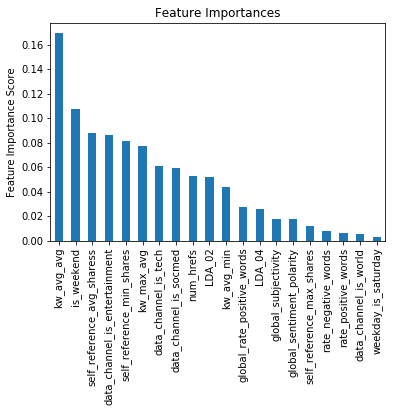

In [128]:
cf = GradientBoostingClassifier()
modelTest(cf, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 10)  

Accuracy score: 0.6534573392640518
Mean of cross validation score: 0.6514344251822036


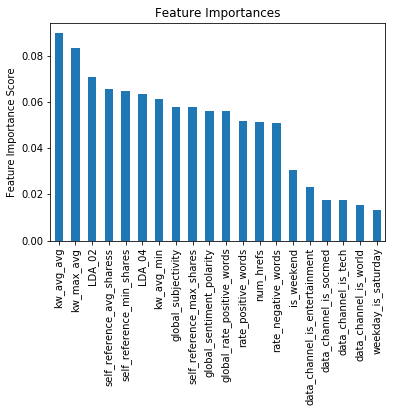

In [102]:
#modelTest(clf, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 10) 
modelTest(clf_CV, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 10) 

In [95]:
modelTest(lr, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 10) 

Accuracy score: 0.6497169429842297
Mean of cross validation score: 0.6463397388978473


In [ ]:
cf = GradientBoostingClassifier()
modelTest(cf, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 10)   

In [111]:
from sklearn.model_selection import learning_curve,GridSearchCV

#param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200), 'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10), 'max_features':range(7,20,2),'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'n_estimators': 80}, 0.7251223748796354)

In [113]:
param_test2 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators = 80, max_depth=5, learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch2.best_params_, gsearch2.best_score_

({'min_samples_leaf': 50, 'min_samples_split': 1200}, 0.7258146973860354)

In [114]:
param_test3 = {'max_features':range(7,20,2),'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators = 80, max_depth=5, learning_rate=0.1, min_samples_split=1200,min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch3.best_params_, gsearch3.best_score_


({'max_features': 19, 'subsample': 0.8}, 0.7268036919608257)

In [117]:
param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2)}

gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 15, 'n_estimators': 80}, 0.7175890838206628)

In [121]:
param_test2 = {'min_samples_split':range(2,1000,200), 'min_samples_leaf':range(30,71,10)}

gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 80, max_depth=15, min_samples_split=500,min_samples_leaf=50,max_features='sqrt',random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch2.best_params_, gsearch2.best_score_

({'min_samples_leaf': 50, 'min_samples_split': 2}, 0.7211099931891307)

In [122]:
param_test3 = {'max_features':range(7,20,2)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 80, max_depth=15, min_samples_split=2,min_samples_leaf=50,max_features=19,random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(x_kbesttrain, y_kbesttrain)
#gsearch1.cv_results_, 
gsearch3.best_params_, gsearch3.best_score_

({'max_features': 9}, 0.7211684633269921)

Accuracy score: 0.6619490497371613
Mean of cross validation score: 0.6498862675693571
Precision: 0.6618541033434651, Recall: 0.6901743264659271, F-beta score: 0.6757176105508146


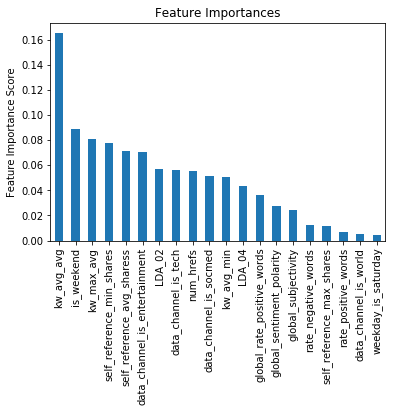

In [130]:
gbc = GradientBoostingClassifier(n_estimators = 80, max_depth=5, learning_rate=0.1, min_samples_split=1200,min_samples_leaf=50,max_features=19,subsample=0.8,random_state=10)
modelTest(gbc, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 10)            

Accuracy score: 0.662252325111201
Mean of cross validation score: 0.6562259707475332
Precision: 0.6627264061010486, Recall: 0.6885895404120443, F-beta score: 0.6754104731370835


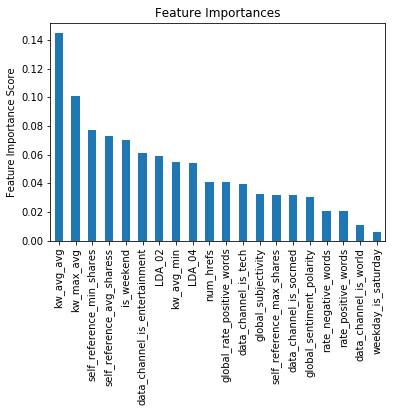

In [131]:
rfc = RandomForestClassifier(n_estimators = 80, max_depth=15, min_samples_split=2,min_samples_leaf=50,max_features=9,random_state=10)
modelTest(rfc, X_kbest, Y, x_kbesttrain, y_kbesttrain,x_kbesttest,y_kbesttest, 10)  